In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import construction as cs
from ETN import count_ETN
from ETNgen import generate_seed_graphs,generate_graph_g2,get_dict

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
def get_number_of_interactions(graphs):
    nb_inter = []
    for g in graphs:
        nb_inter.append(len(g.edges()))
    return nb_inter
    
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

from matplotlib.lines import Line2D

# load data as an array of static graphs

In [23]:
file_name = "LH10"

data_in = cs.load_data("Datasets/"+file_name+".dat")

gap = 299 
# gap = 599 used  for SMS and calls
graphs = cs.build_graphs(data_in,gap=gap)

print(len(graphs))

1159


### count ETNS and store it in dictionaries (one for each local split)

In [24]:
k=2
ETNS = count_ETN(graphs,k)
ETNS = {k: v for k, v in sorted(ETNS.items(),reverse=True, key=lambda item: item[1])}

diz = get_dict(ETNS,k)

### starting from a seed graph generate seed graphs up to k!

In [25]:
graph_seed = graphs[0:k]
#graph_seed = generate_seed_graphs(g0,graphs,k,alpha = 0.5)

In [26]:
# decide how many graphs you want to generate
nb_graphs = len(graphs)

In [27]:
c =  1
hour = 0 
nodes = list(graph_seed[0].nodes())
tg = graph_seed
verbose = True

for i in range(nb_graphs-1):
    
    graphs_in = tg[i:i+k]
    g_new = generate_graph_g2(nodes,graphs_in,diz,k,alpha = 0.5)
    tg.append(g_new)
    
    if verbose:
        if i % 100 == 0:
            print(i,"over",nb_graphs)

0 over 1159
100 over 1159
200 over 1159
300 over 1159
400 over 1159
500 over 1159
600 over 1159
700 over 1159
800 over 1159
900 over 1159
1000 over 1159
1100 over 1159


# save graphs as temporal edge list

In [28]:
new_temporal_graph_name = "ETNgen-"+file_name+"_uniqueDict"
print(new_temporal_graph_name)

ETNgen-LH10_uniqueDict


In [29]:
edge_list = []
c = 0 
gap = 300
nodes = set()
for i in tg:
    edges = list(i.edges())

    for a,b in edges:
        edge_list.append([c*gap,a,b])
        nodes.add(a)
        nodes.add(b)
    c = c + 1
    
orig_nod = set(tg[0].nodes())
diff = orig_nod.difference(nodes)
for i in diff:
    edge_list.append([c*gap,i,i])

In [30]:
df_edge_list = pd.DataFrame(edge_list,columns=["time","node_A","node_B"])
df_edge_list.to_csv("unique_dictionary/"+new_temporal_graph_name+".dat",sep=" ",index=False,header=False)

# plot

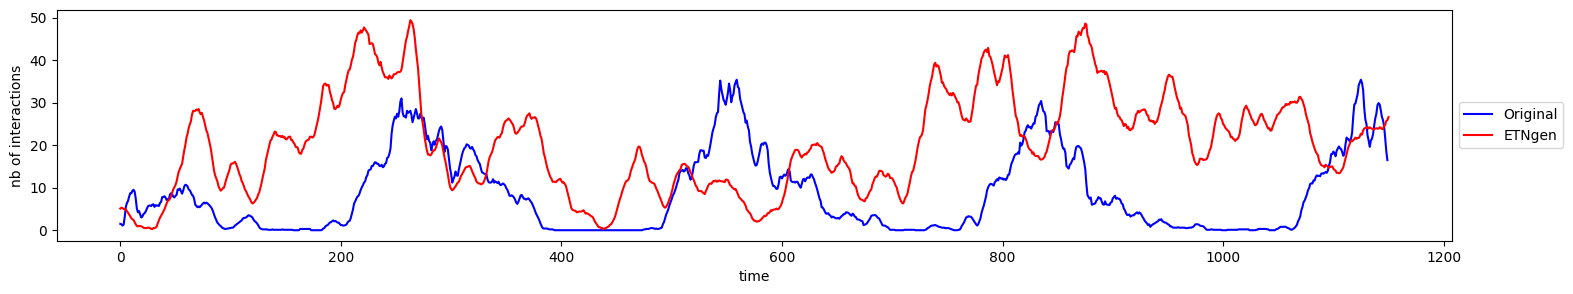

In [31]:
w = 10
nb_inter = get_number_of_interactions(graphs)
smooth_nb_int = moving_average(nb_inter,w)


plt.figure(figsize=(18,3))
plt.plot(smooth_nb_int,color="blue",label="Original")
plt.plot(moving_average(get_number_of_interactions(tg),w),color="red",label="ETNgen")
plt.xlabel("time")
plt.ylabel("nb of interactions")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()